In [1]:
%reload_ext autoreload
%autoreload 2

In [1]:
import numpy as np

import pandas as pd

pd.set_option("display.precision", 3)

import matplotlib.pyplot as plt
import seaborn as sns

import json

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../assets/AB_NYC_2019.csv")

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.647,-73.972,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.754,-73.984,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.809,-73.942,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.685,-73.960,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.799,-73.944,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
from preprocess import DataPreprocessor

data_preprocessor = DataPreprocessor(df)

data_preprocessor.preprocess_airbnb_data()

In [4]:
processed = data_preprocessor.get_preprocessed_data()

processed.head()

,latitude,longitude,price,number_of_reviews,availability_365,hosts_multiple_apts,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,...,neighbourhood_small districts in Queens,neighbourhood_small districts in Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,review_recency_Last month,review_recency_Last quarter,review_recency_Last year,review_recency_No reviews,review_recency_Over a year ago
0,0.357,0.512,149,0.014,1,1,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
1,0.614,0.490,225,0.072,1,1,False,False,True,False,...,False,False,True,False,False,False,True,False,False,False
2,0.748,0.569,150,0.000,1,0,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
3,0.448,0.536,89,0.429,1,0,False,True,False,False,...,False,False,True,False,False,True,False,False,False,False
4,0.723,0.565,80,0.014,0,0,False,False,True,False,...,False,False,True,False,False,False,False,True,False,False


In [2]:
data = pd.read_csv("assets/AB_NYC_2019.csv")
print(f"Суммарное кол-во строк: {len(data)}")

data, data_test = train_test_split(data, test_size=0.3, random_state=0)
print(f"Train: {len(data)}, Test: {len(data_test)}")

Суммарное кол-во строк: 48895
Train: 34226, Test: 14669


In [3]:
data = data.drop(["id", "name", "host_id", "host_name"], axis=1)
data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
13115,Brooklyn,Williamsburg,40.716,-73.937,Entire home/apt,180,7,0,NaN,NaN,1,0
10214,Manhattan,Hell's Kitchen,40.762,-73.991,Private room,100,3,4,2016-10-15,0.09,1,0
577,Brooklyn,Bensonhurst,40.619,-73.994,Entire home/apt,110,1,24,2019-01-19,0.26,1,183
40078,Brooklyn,Bushwick,40.697,-73.924,Private room,61,2,1,2019-01-01,0.16,1,307
33301,Brooklyn,Williamsburg,40.716,-73.957,Entire home/apt,165,4,3,2018-08-07,0.24,2,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34226 entries, 13115 to 2732
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             34226 non-null  object 
 1   neighbourhood                   34226 non-null  object 
 2   latitude                        34226 non-null  float64
 3   longitude                       34226 non-null  float64
 4   room_type                       34226 non-null  object 
 5   price                           34226 non-null  int64  
 6   minimum_nights                  34226 non-null  int64  
 7   number_of_reviews               34226 non-null  int64  
 8   last_review                     27203 non-null  object 
 9   reviews_per_month               27203 non-null  float64
 10  calculated_host_listings_count  34226 non-null  int64  
 11  availability_365                34226 non-null  int64  
dtypes: float64(3), int64(5), object(4)

In [7]:
preprocessing_dict = {}

## Feature Analysis

### `neighbourhood_group` & `neighbourhood`

Колонка `neighbourhood_group` содержит данные об укрупненном районе Нью-Йорка, а колонка `neighbourhood` - точное название района.

In [5]:
print(f"Число укрупненных районов: {len(data['neighbourhood_group'].unique())}")

nbhd_counts = data["neighbourhood"].value_counts()
print(f"Число районов: {len(nbhd_counts)}")

Число укрупненных районов: 5
Число районов: 218


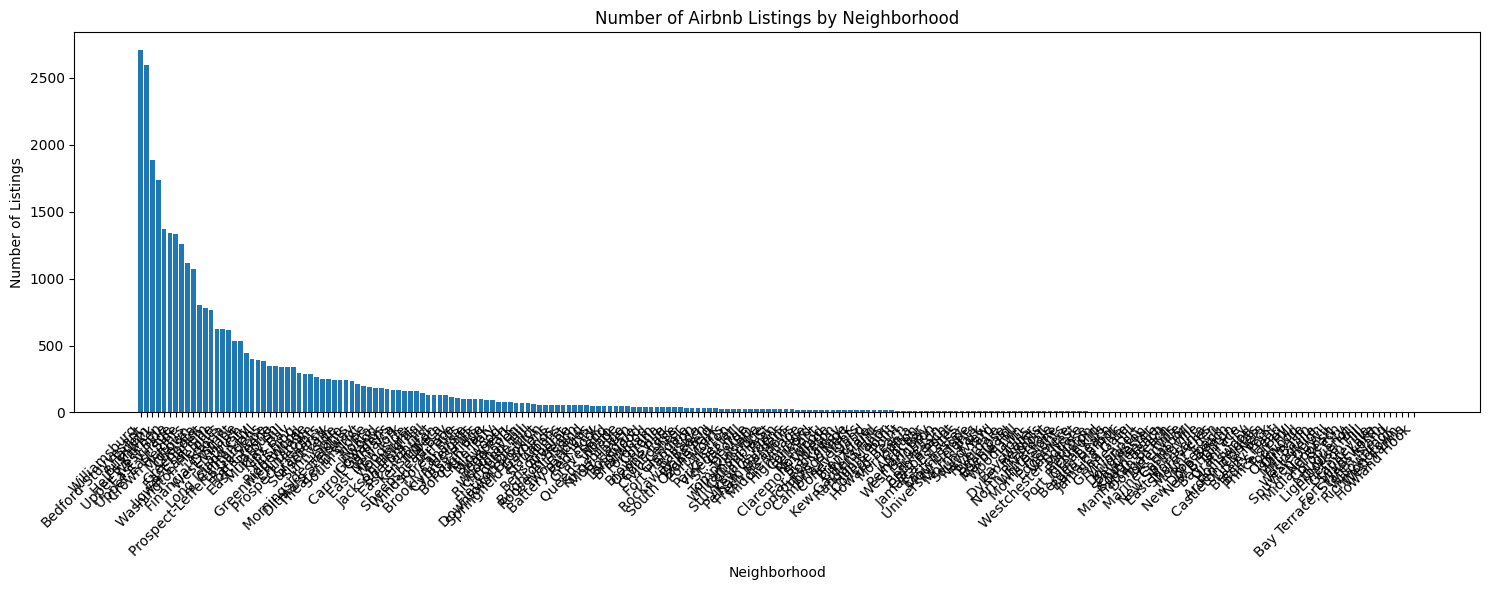

In [6]:
plt.figure(figsize=(15, 6))
plt.bar(nbhd_counts.index, nbhd_counts.values)

plt.xticks(rotation=45, ha="right")

plt.xlabel("Neighborhood")
plt.ylabel("Number of Listings")
plt.title("Number of Airbnb Listings by Neighborhood")

plt.tight_layout()
plt.show()

Так как суммарно районов достаточно много, можно сократить их число, заменив мелкие районы на указание к укрупненному району.

In [7]:
min_apt_num = 500
print(
    f"Кол-во районов с числом квартир, больших {min_apt_num}: "
    f"{len(nbhd_counts[nbhd_counts > min_apt_num])}\n"
    f"Доля от общего числа квартир: {sum(nbhd_counts[nbhd_counts > min_apt_num]) / sum(nbhd_counts):.3f}"
)

Кол-во районов с числом квартир, больших 500: 18
Доля от общего числа квартир: 0.634


Рассмотрим, в каких крупных районах чаще всего попадаются одиночные медкие указания районов

In [8]:
small_neighborhoods = nbhd_counts[nbhd_counts < min_apt_num].index
nbhd_filtered = data[data["neighbourhood"].isin(small_neighborhoods)].groupby(
    "neighbourhood_group"
)

nbhd_filtered.size()

neighbourhood_group
Bronx             752
Brooklyn         5107
Manhattan        3076
Queens           3344
Staten Island     252
dtype: int64

Заменим названия редких районов на "small district in <neighbourhood_group>"

In [9]:
data_in_small_disctricts = data["neighbourhood"].isin(small_neighborhoods)
data.loc[data_in_small_disctricts, "neighbourhood"] = (
    "small discricts in " + data.loc[data_in_small_disctricts, "neighbourhood_group"]
)

print(data["neighbourhood"].value_counts())

neighbourhood
small discricts in Brooklyn         5107
small discricts in Queens           3344
small discricts in Manhattan        3076
Williamsburg                        2704
Bedford-Stuyvesant                  2598
Harlem                              1882
Bushwick                            1736
Hell's Kitchen                      1372
Upper West Side                     1339
East Village                        1331
Upper East Side                     1259
Crown Heights                       1119
Midtown                             1072
Chelsea                              804
Greenpoint                           777
East Harlem                          765
small discricts in Bronx             752
Lower East Side                      627
Washington Heights                   626
Astoria                              616
Financial District                   536
West Village                         532
small discricts in Staten Island     252
Name: count, dtype: int64


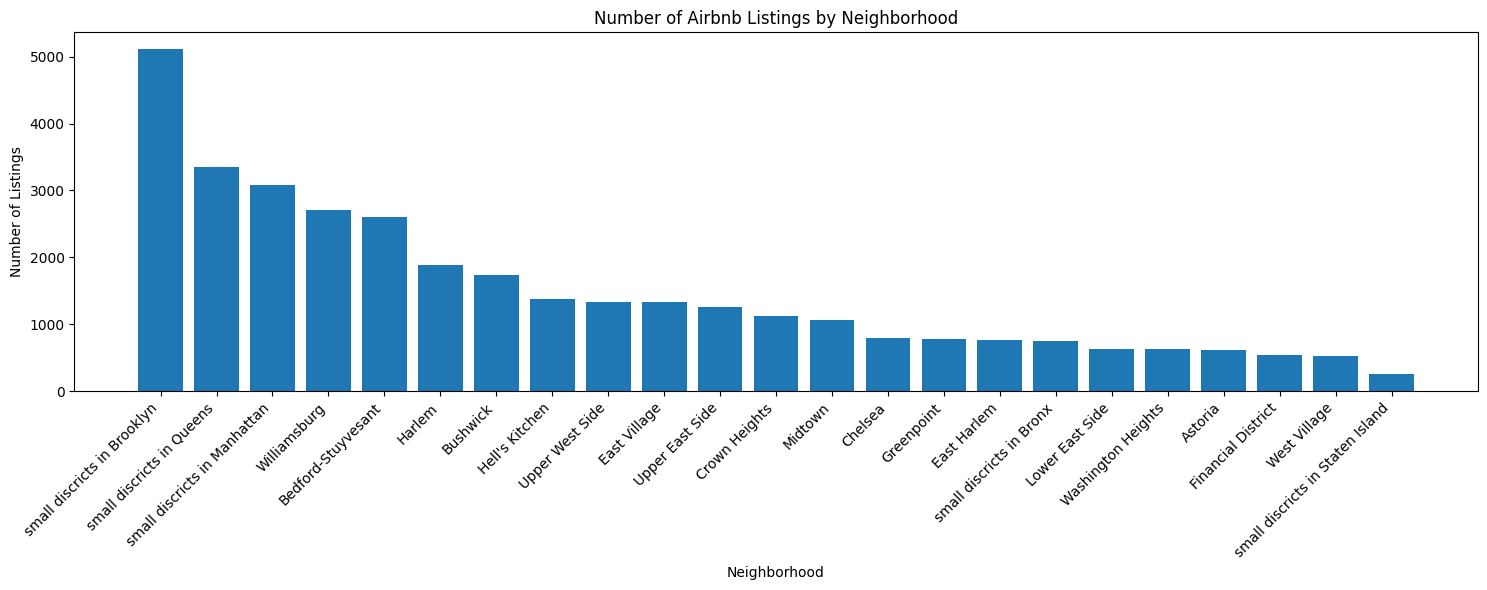

In [10]:
nbhd_counts = data["neighbourhood"].value_counts()

plt.figure(figsize=(15, 6))  # Make the plot wider for better readability
plt.bar(nbhd_counts.index, nbhd_counts.values)

plt.xticks(rotation=45, ha="right")

plt.xlabel("Neighborhood")
plt.ylabel("Number of Listings")
plt.title("Number of Airbnb Listings by Neighborhood")

plt.tight_layout()
plt.show()

In [11]:
final_neighbourhoods = data["neighbourhood"].unique()
final_neighbourhoods

array(['Williamsburg', "Hell's Kitchen", 'small discricts in Brooklyn',
       'Bushwick', 'Upper West Side', 'small discricts in Queens',
       'East Village', 'Midtown', 'small discricts in Manhattan',
       'Crown Heights', 'Bedford-Stuyvesant', 'Lower East Side', 'Harlem',
       'Greenpoint', 'East Harlem', 'Financial District', 'Astoria',
       'small discricts in Staten Island', 'small discricts in Bronx',
       'Upper East Side', 'Washington Heights', 'Chelsea', 'West Village'],
      dtype=object)

In [12]:
with open("assets/final_neighbourhoods.txt", "w") as f:
    for entry in final_neighbourhoods:
        f.write(f"{entry}\n")

### `room_type`

Здесь представлены всего три значения, из которых два представлены в 20 раз чаще, чем остальные. 

In [13]:
data["room_type"].value_counts()

room_type
Entire home/apt    17810
Private room       15605
Shared room          811
Name: count, dtype: int64

###  `reviews_per_month` & `number_of_reviews` & `last_review`

In [14]:
data[["reviews_per_month", "number_of_reviews"]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 34226 entries, 13115 to 2732
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   reviews_per_month  27203 non-null  float64
 1   number_of_reviews  34226 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 802.2 KB


In [15]:
data[["reviews_per_month", "number_of_reviews"]].corr()

,reviews_per_month,number_of_reviews
reviews_per_month,1.000,0.552
number_of_reviews,0.552,1.000


Колонки `reviews_per_month` и `number_of_reviews` достаточно сильно коррелируют. Так как в колонке `reviews_per_month` также присутствуют пропуски, эта колонка будет удалена.

In [16]:
data = data.drop(["reviews_per_month"], axis=1)

В колонке `last_review` находится дата последнего отзыва о данных апартаментах. Дата представлена как строка ГГ-ММ-ДД, что не удобно для анализа, а также есть строки с отсутствующими значениями

In [17]:
f"Число значений None: {sum(data['last_review'].isna())}, доля: {sum(data['last_review'].isna()) / len(data):.3f}"

'Число значений None: 7023, доля: 0.205'

In [18]:
data["last_review"] = pd.to_datetime(
    data["last_review"], format="%Y-%m-%d", errors="coerce"
)
data["last_review"].head(5)

13115          NaT
10214   2016-10-15
577     2019-01-19
40078   2019-01-01
33301   2018-08-07
Name: last_review, dtype: datetime64[ns]

Для того, чтобы избавиться от даты, можно преобразовать признак и рассмотреть, сколько дней прошло с момента последнего отзыва. Однако, данный способ создает сильную зависимость от референсной даты, из-за чего на проде со временем может появляться дрейф данных - так как этот признак исходного датасета придется пересчитывать.

Тем не менее, поскольку сейчас мы рассматриваем случай, когда тестовые данные будут из того же распределения и сдвига не будет, такой подход возможен и в качестве референсной даты выбрана дата последнего отзыва из всех данных.

In [19]:
reference_date = data["last_review"].max()
data["days_since_review"] = (reference_date - data["last_review"]).dt.days


def categorize_review_recency(days):
    if pd.isna(days):
        return "No reviews"
    elif days <= 30:
        return "Last month"
    elif days <= 90:
        return "Last quarter"
    elif days <= 365:
        return "Last year"
    else:
        return "Over a year ago"


data["review_recency"] = data["days_since_review"].apply(categorize_review_recency)
data["review_recency"].value_counts()

review_recency
Last month         11244
No reviews          7023
Over a year ago     6781
Last year           4823
Last quarter        4355
Name: count, dtype: int64

In [23]:
data = data.drop(["days_since_review", "last_review"], axis=1)

In [24]:
data.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365', 'review_recency'],
      dtype='object')

## Encoding of object/string values & Analysis

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
object_columns = ["neighbourhood_group", "neighbourhood", "room_type", "review_recency"]
for c in object_columns:
    data[c] = le.fit_transform(data[c])
    if c in preprocessing_dict.keys():
        preprocessing_dict[c]["encoder"] = {
            lbl: idx for idx, lbl in enumerate(le.classes_)
        }
    else:
        preprocessing_dict[c] = {
            "encoder": {lbl: idx for idx, lbl in enumerate(le.classes_)}
        }

In [26]:
C = len(data.columns)
L = len(data.index)

MN = data.min()  # минимум
Q1 = data.quantile(q=0.25)  # первый квартиль
MA = data.mean()  # среднее значение
ME = data.median()  # медиана
Q3 = data.quantile(q=0.75)  # третий квартиль
MX = data.max()  # максимум
ST = data.std()  # стандартное отклонение
P = data.nunique().astype(np.uint32)  # мощность
IQ = Q3 - Q1  # интерквартильный размах

info_frame = pd.concat([MN, Q1, MA, ME, Q3, MX, ST, P, IQ], axis=1, join="inner")
info_frame.columns = [
    "Минимум",
    "Первый квартиль",
    "Среднее",
    "Медиана",
    "Третий квартиль",
    "Максимум",
    "Стандартное отклонение",
    "Мощность",
    "Интерквартильный размах",
]
info_frame.astype(object)

,Минимум,Первый квартиль,Среднее,Медиана,Третий квартиль,Максимум,Стандартное отклонение,Мощность,Интерквартильный размах
neighbourhood_group,0.0,1.0,1.676,2.0,2.0,4.0,0.734,5,1.0
neighbourhood,0.0,6.0,12.622,14.0,19.0,22.0,7.033,23,13.0
latitude,40.5,40.69,40.729,40.723,40.763,40.913,0.054,16418,0.073
longitude,-74.244,-73.983,-73.952,-73.956,-73.936,-73.713,0.046,12903,0.047
room_type,0.0,0.0,0.503,0.0,1.0,2.0,0.545,3,1.0
price,0.0,69.0,152.522,106.5,175.0,10000.0,244.178,609,106.0
minimum_nights,1.0,1.0,7.071,3.0,5.0,1250.0,21.16,98,4.0
number_of_reviews,0.0,1.0,23.572,5.0,24.0,629.0,45.123,368,23.0
calculated_host_listings_count,1.0,1.0,7.164,1.0,2.0,327.0,33.06,47,1.0
availability_365,0.0,0.0,112.929,45.0,228.0,365.0,131.677,366,228.0


По данной аналитике можно сделать следующие выводы по поводу препроцессинга:
1. Колонки, конвертированные из строковых типов (`neighbourhood_group`, `neighbourhood`, `room_type`, `review_recency`) нужно дополнительно нормировать
2. Колонки `latitude`, `longitude` - также нормировать
3. Таргет - колонка `price` - нужно дополнительно рассмотреть при обучении, так как максимальное значение значительно больше третьего квартиля - возможны выбросы в данных, которые будут негативно влиять на работу модели
4. Колонки `minimum_nights`, `number_of_reviews`, `calculated_host_listings_count` нужно рассмотреть дополнительно, по аналогичной причине - есть непонятные выбросы.
5. Колонку `availability_365` нужно дополнительно рассмотреть, поскольку более 25% данных - нули.

#### `minimum_nights`

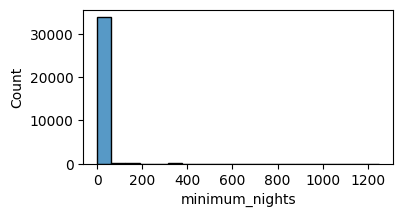

In [27]:
sns.histplot(data["minimum_nights"], bins=20)
plt.gcf().set_size_inches(4, 2)

In [28]:
sum(data["minimum_nights"] < 10)

29270

Так как более 90% данных находятся в диапазоне от 0 до 10 при общем диапазоне до 1200, влияние данной колонки можно считать незначительным. Присутствуют только выбросы, которые могут влиять на работу модели.

In [29]:
data = data.drop(["minimum_nights"], axis=1)

#### `calculated_host_listings_count`

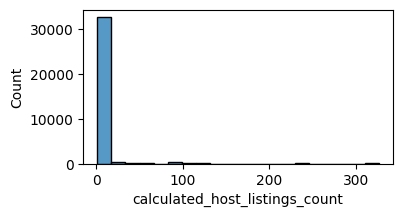

In [30]:
sns.histplot(data["calculated_host_listings_count"], bins=20)
plt.gcf().set_size_inches(4, 2)

In [31]:
data["hosts_multiple_apts"] = (data["calculated_host_listings_count"] > 1).astype(
    np.uint8
)

In [32]:
data["hosts_multiple_apts"].value_counts()

hosts_multiple_apts
0    22649
1    11577
Name: count, dtype: int64

In [33]:
data = data.drop(["calculated_host_listings_count"], axis=1)

#### `availability_365`

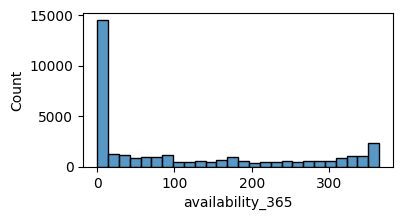

In [34]:
sns.histplot(data["availability_365"])
plt.gcf().set_size_inches(4, 2)

In [35]:
sum(data["availability_365"] == 0), sum(data["availability_365"] > 0)

(12233, 21993)

По построенному графику очевидно, что более трети всех данных имеют значение поля "доступность_365", равное 0. Так как не до конца ясно, что именно означает данный признак, просто заменим его на бинарный.

In [36]:
data["availability_365"] = (data["availability_365"] > 0).astype(np.uint8)

## MinMax Scaling

In [37]:
data.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'number_of_reviews', 'availability_365',
       'review_recency', 'hosts_multiple_apts'],
      dtype='object')

In [38]:
from sklearn.preprocessing import MinMaxScaler
from copy import deepcopy

scaler = MinMaxScaler()

columns = [
    "neighbourhood_group",
    "neighbourhood",
    "room_type",
    "latitude",
    "longitude",
    "number_of_reviews",
    "review_recency",
]
data_scaled = deepcopy(data)
for c in columns:
    data_scaled[c] = scaler.fit_transform(data_scaled[[c]])
    if c in preprocessing_dict.keys():
        preprocessing_dict[c]["scaler"] = {
            "max": scaler.data_max_[0],
            "min": scaler.data_min_[0],
        }
    else:
        preprocessing_dict[c] = {
            "scaler": {"max": scaler.data_max_[0], "min": scaler.data_min_[0]}
        }

data_scaled.describe()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,availability_365,review_recency,hosts_multiple_apts
count,34226.000,34226.000,34226.000,34226.000,34226.000,34226.000,34226.000,34226.000,34226.000,34226.000
mean,0.419,0.574,0.554,0.550,0.252,152.522,0.037,0.643,0.454,0.338
std,0.183,0.320,0.132,0.087,0.273,244.178,0.072,0.479,0.388,0.473
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.250,0.273,0.460,0.492,0.000,69.000,0.002,0.000,0.000,0.000
50%,0.500,0.636,0.540,0.543,0.000,106.500,0.008,1.000,0.500,0.000
75%,0.500,0.864,0.637,0.580,0.500,175.000,0.038,1.000,0.750,1.000
max,1.000,1.000,1.000,1.000,1.000,10000.000,1.000,1.000,1.000,1.000


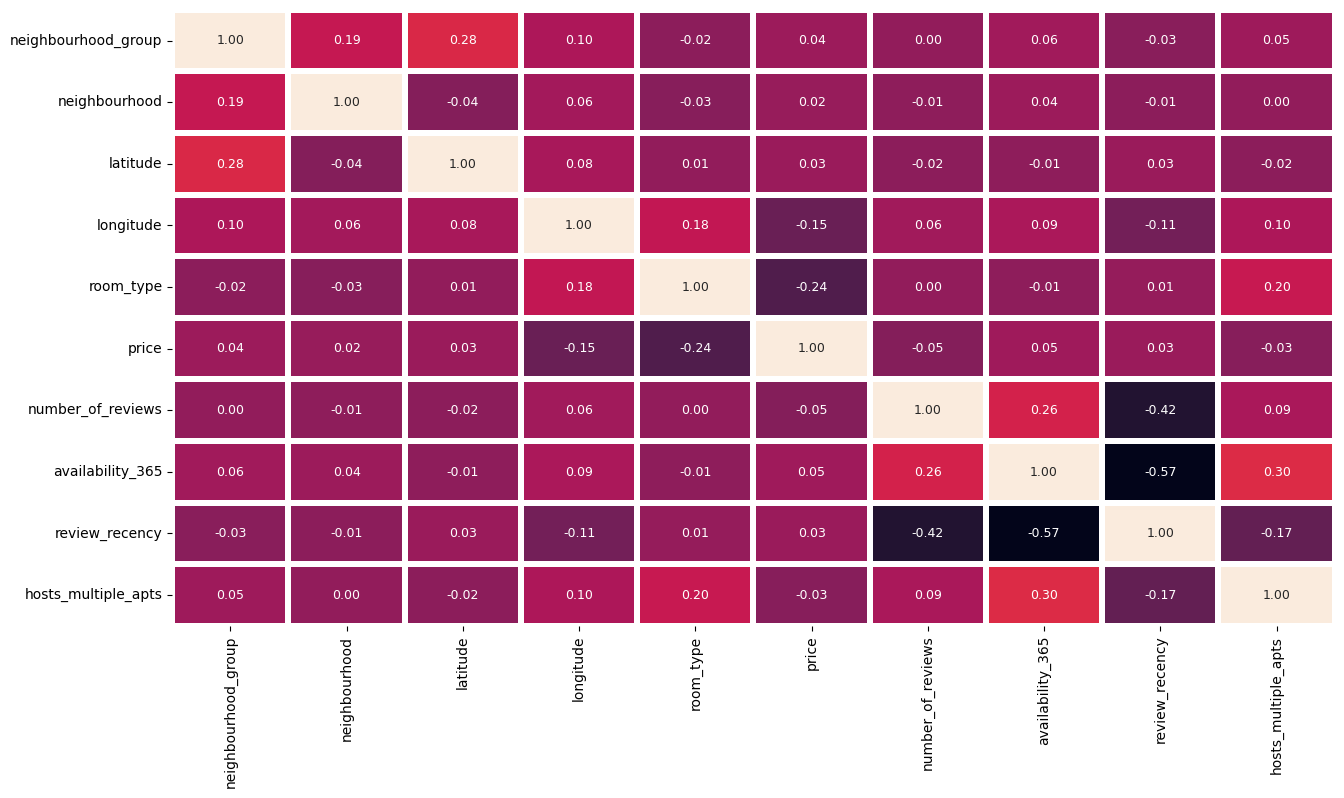

In [39]:
sns.heatmap(
    data_scaled.corr(),
    annot=True,
    linewidths=3,
    fmt=".2f",
    cbar=False,
    annot_kws={"size": 9},
    xticklabels=True,
    yticklabels=True,
)
plt.gcf().set_size_inches(15, 8)

In [40]:
for c in data.columns:
    if c not in preprocessing_dict.keys():
        preprocessing_dict[c] = {}

keys_to_remove = set(preprocessing_dict.keys()).difference(set(data.columns))
for key in keys_to_remove:
    del preprocessing_dict[key]

In [41]:
preprocessing_dict

{'neighbourhood_group': {'encoder': {'Bronx': 0,
   'Brooklyn': 1,
   'Manhattan': 2,
   'Queens': 3,
   'Staten Island': 4},
  'scaler': {'max': 4.0, 'min': 0.0}},
 'neighbourhood': {'encoder': {'Astoria': 0,
   'Bedford-Stuyvesant': 1,
   'Bushwick': 2,
   'Chelsea': 3,
   'Crown Heights': 4,
   'East Harlem': 5,
   'East Village': 6,
   'Financial District': 7,
   'Greenpoint': 8,
   'Harlem': 9,
   "Hell's Kitchen": 10,
   'Lower East Side': 11,
   'Midtown': 12,
   'Upper East Side': 13,
   'Upper West Side': 14,
   'Washington Heights': 15,
   'West Village': 16,
   'Williamsburg': 17,
   'small discricts in Bronx': 18,
   'small discricts in Brooklyn': 19,
   'small discricts in Manhattan': 20,
   'small discricts in Queens': 21,
   'small discricts in Staten Island': 22},
  'scaler': {'max': 22.0, 'min': 0.0}},
 'room_type': {'encoder': {'Entire home/apt': 0,
   'Private room': 1,
   'Shared room': 2},
  'scaler': {'max': 2.0, 'min': 0.0}},
 'review_recency': {'encoder': {'Last

In [42]:
with open("assets/preprocessing_info.json", "w") as f:
    json.dump(preprocessing_dict, f, indent=2)

## Model Selection

### `price` problem

Text(0, 0.5, '')

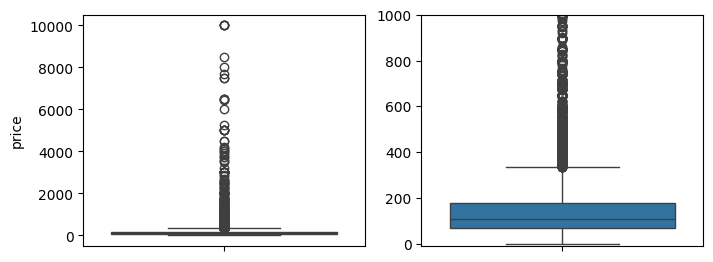

In [43]:
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(8, 3))

sns.boxplot(data["price"], ax=axes[0])

sns.boxplot(data["price"], ax=axes[1])
axes[1].set_ylim(-10, 1000)
axes[1].set_ylabel("")

In [44]:
iqr = data["price"].quantile(0.75) - data["price"].quantile(0.25)
statistical_max = data["price"].quantile(0.75) + 1.5 * iqr
statistical_max

334.0

In [45]:
len(data[data["price"] < statistical_max]), len(data)

(32171, 34226)

Есть небольшое число выбросов, но они достаточно большие и сильно влияют на качество модели. При обучении модели строки с таргетом, большим чем `statistical_max` будут отброшены из выборок.

### Correlation

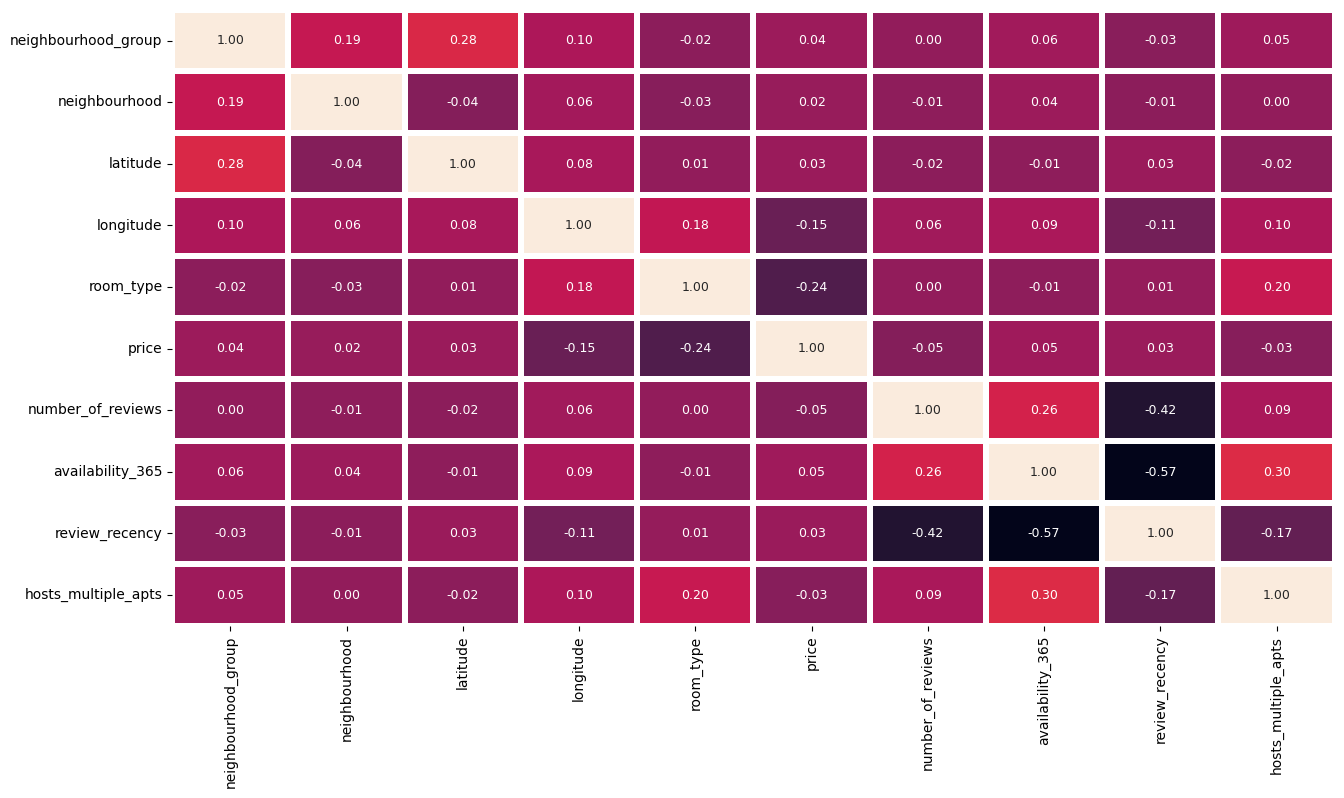

In [46]:
sns.heatmap(
    data_scaled.corr(),
    annot=True,
    linewidths=3,
    fmt=".2f",
    cbar=False,
    annot_kws={"size": 9},
    xticklabels=True,
    yticklabels=True,
)
plt.gcf().set_size_inches(15, 8)

### Models

In [47]:
with open("assets/final_neighbourhoods.txt", "r") as file:
    final_neighbourhoods = file.readlines()
final_neighbourhoods = [s.strip() for s in final_neighbourhoods]


def categorize_review_recency(days):
    if pd.isna(days):
        return "No reviews"
    elif days <= 30:
        return "Last month"
    elif days <= 90:
        return "Last quarter"
    elif days <= 365:
        return "Last year"
    else:
        return "Over a year ago"


# Информация от энкодера/скейлера
with open("assets/preprocessing_info.json", "r") as f:
    preprocessing_info = json.load(f)

In [48]:
def preprocess(df):
    df = df.drop(["id", "name", "host_id", "host_name"], axis=1)

    data_in_small_disctricts = ~df["neighbourhood"].isin(final_neighbourhoods)
    df.loc[data_in_small_disctricts, "neighbourhood"] = (
        "small discricts in " + df.loc[data_in_small_disctricts, "neighbourhood_group"]
    )

    df["last_review"] = pd.to_datetime(
        df["last_review"], format="%Y-%m-%d", errors="coerce"
    )
    reference_date = df["last_review"].max()
    df["days_since_review"] = (reference_date - df["last_review"]).dt.days
    df["review_recency"] = df["days_since_review"].apply(categorize_review_recency)

    df = df.drop(["reviews_per_month", "days_since_review", "last_review"], axis=1)

    df["hosts_multiple_apts"] = (df["calculated_host_listings_count"] > 1).astype(
        np.int8
    )
    df["availability_365"] = (df["availability_365"] > 0).astype(np.int8)

    df = df.drop(["calculated_host_listings_count", "minimum_nights"], axis=1)

    for col, column_actions in preprocessing_info.items():
        if "encoder" in column_actions.keys():
            df[col] = df[col].map(column_actions["encoder"]).astype(np.int32)
        if "scaler" in column_actions.keys():
            df[col] = (df[col] - column_actions["scaler"]["min"]) / (
                column_actions["scaler"]["max"] - column_actions["scaler"]["min"]
            )
    return df

In [49]:
data_test = preprocess(data_test)
data_test.head(3)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,availability_365,review_recency,hosts_multiple_apts
43813,0.50,0.909,0.543,0.439,0.0,225,0.000,1,0.75,0
32734,0.50,0.909,0.546,0.473,0.0,649,0.008,1,0.50,0
25276,0.25,0.773,0.525,0.554,0.0,300,0.008,1,0.00,1


In [50]:
data_scaled.head(3)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,availability_365,review_recency,hosts_multiple_apts
13115,0.25,0.773,0.522,0.578,0.0,180,0.000,0,0.75,0
10214,0.50,0.455,0.635,0.477,0.5,100,0.006,0,1.00,0
577,0.25,0.864,0.289,0.471,0.0,110,0.038,1,0.50,0


In [51]:
data_scaled = data_scaled[data_scaled["price"] < statistical_max]

y_train = data_scaled[["price"]]
X_train = data_scaled.drop(["price"], axis=1)
X_train.to_numpy().shape, y_train.to_numpy().shape

((32171, 9), (32171, 1))

In [52]:
data_test = data_test[data_test["price"] < statistical_max]

y_test = data_test[["price"]]
X_test = data_test.drop(["price"], axis=1)

#### BaggingRegressor (best)

In [53]:
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor(n_estimators=50, max_samples=0.5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

d:\DEV\python_venvs\mlops_venv_3.9\lib\site-packages\sklearn\ensemble\_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


0.821166828307635
0.5355344860837774


In [54]:
from sklearn.metrics import r2_score, mean_absolute_error

print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.5355344860837774
33.62807012439078


In [55]:
comp = pd.concat(
    [y_test, pd.DataFrame(y_pred, index=y_test.index)],
    axis=1,
)
comp.columns = ["test", "pred"]
comp

,test,pred
43813,225,248.60
25276,300,198.24
36084,26,51.66
17736,125,100.14
15253,49,52.70
...,...,...
48122,69,58.50
42652,220,164.10
22776,199,66.66
43308,150,227.60


#### Other models

In [56]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.4352820209588827
0.43454513494050095


In [57]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.01)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.4249991965420423
0.4242411242001273


In [58]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.001)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.43528192056139936
0.43454469908954285
